# Support Vector Machines Project
For this project, we will be exploring publically available data from [LendingClub.com](https://www.lendingclub.com/). Lending Club connects people who need money (borrowers) with peope who have money (investors.) Hopefully, as an investor, you would want to invest in people who showed a profile of having a high proability of paying you back. We'll try to create a model that will help us predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. LendingClub experienced problems in early 2016, with difficulties in attracting investors, a scandal over some of the firm's loans and concerns by the board over CEO Renaud Laplanche's disclosures leading to a large drop in its share price and Laplanche's resignation. 



We'll use lending data from 2007-2010, before LendingClub went public. We will try to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv file already provided. It's recommended you use the csv file provided since I've already cleaned the data of NA values.

Here's what the columns represent:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


## Data
__Open the loan_data.csv file and save it as a dataframe called loans.__

In [2]:
loans <- read.csv("loan_data.csv")

__Check the summary and structure of loans__

In [4]:
summary(loans)
str(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


__Convert the following columns to catgetorial data using factor()__
- inq.last.6mths
- delinq.2yrs
- pub.rec
- not.fully.paid
- credit.policy

In [8]:
library(dplyr)

loans$inq.last.6mths <- sapply(loans$inq.last.6mths, factor)
loans$delinq.2yrs <- sapply(loans$delinq.2yrs, factor)
loans$pub.rec <- sapply(loans$pub.rec, factor)
loans$not.fully.paid <- sapply(loans$not.fully.paid, factor)
loans$credit.policy <- sapply(loans$credit.policy, factor)

str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : Factor w/ 28 levels "0","1","2","3",..: 1 1 2 2 1 1 1 1 2 2 ...
 $ delinq.2yrs      : Factor w/ 11 levels "0","1","2","4",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ pub.rec          : Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ not.fully.paid   

## Exploratory Data Analysis
__Create a histogram of fico scores colored by not.fully.paid__

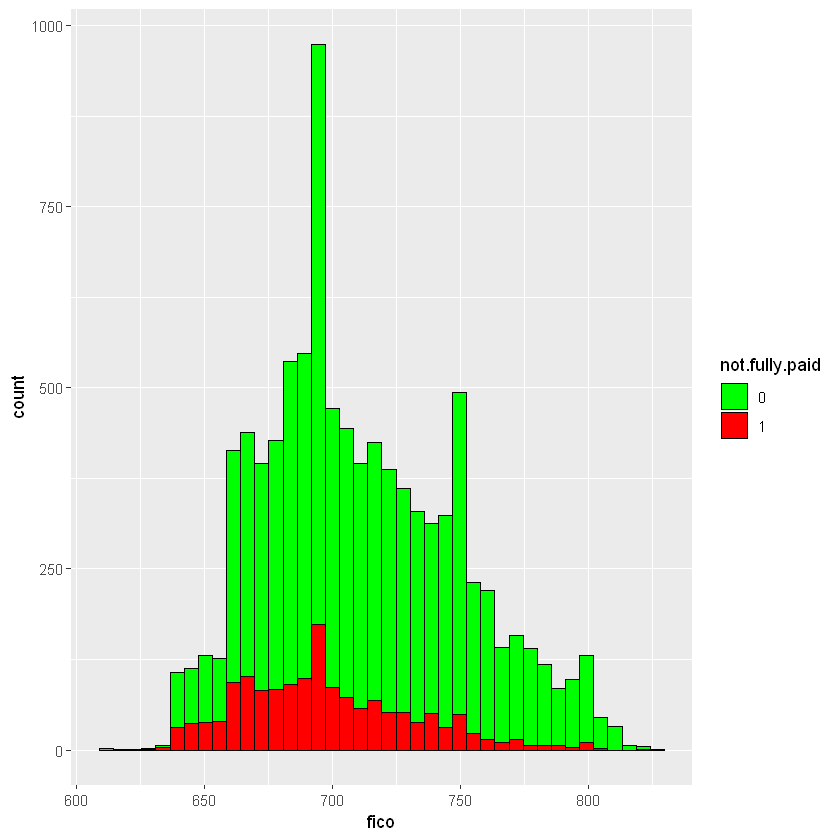

In [45]:
library(ggplot2)
ggplot(data = loans , aes(x = fico)) + 
geom_histogram(aes(fill = not.fully.paid), bins = 40, color = 'black') +
scale_fill_manual(values = c('green','red'))

__Create a barplot of purpose counts, colored by not.fully.paid. Use position=dodge in the geom_bar argument__

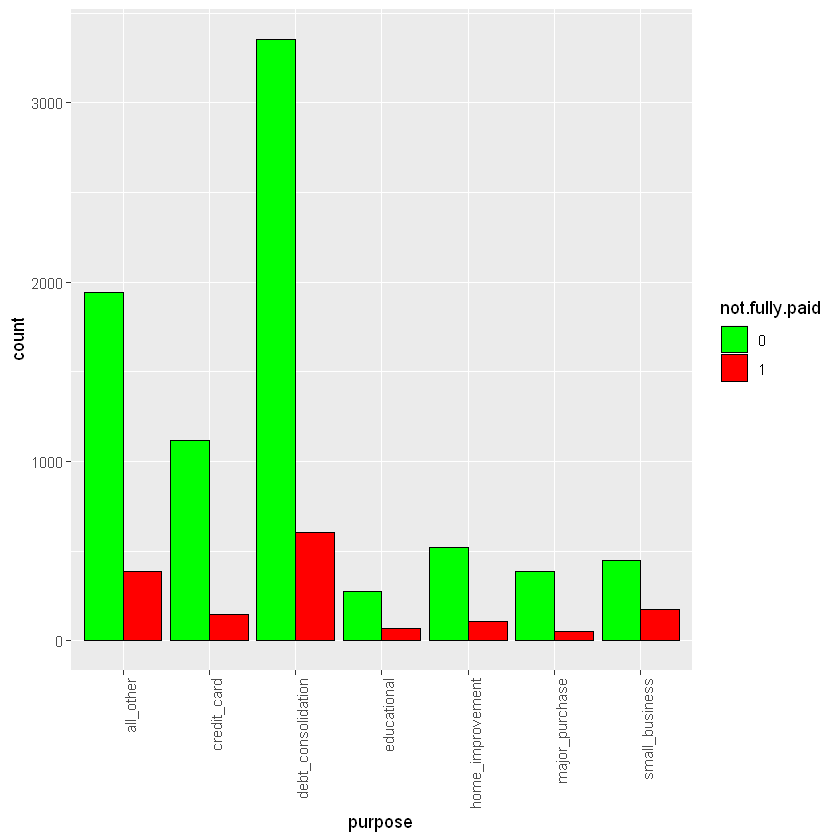

In [51]:
ggplot(data = loans , aes(x = purpose)) + 
geom_bar(aes(fill = not.fully.paid), position = "dodge", color = 'black') +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
scale_fill_manual(values = c('green','red'))

__Create a scatterplot of fico score versus int.rate. Does the trend make sense? Play around with the color scheme if you want.__

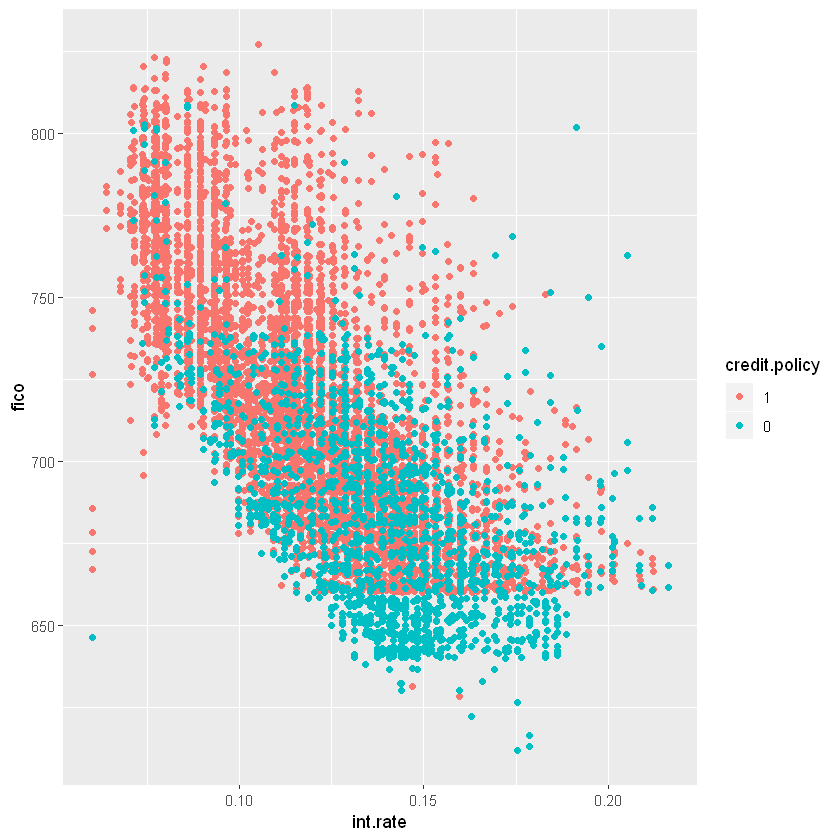

In [48]:
ggplot(data = loans , aes(x = int.rate, y = fico)) + 
geom_jitter(aes(color = credit.policy))

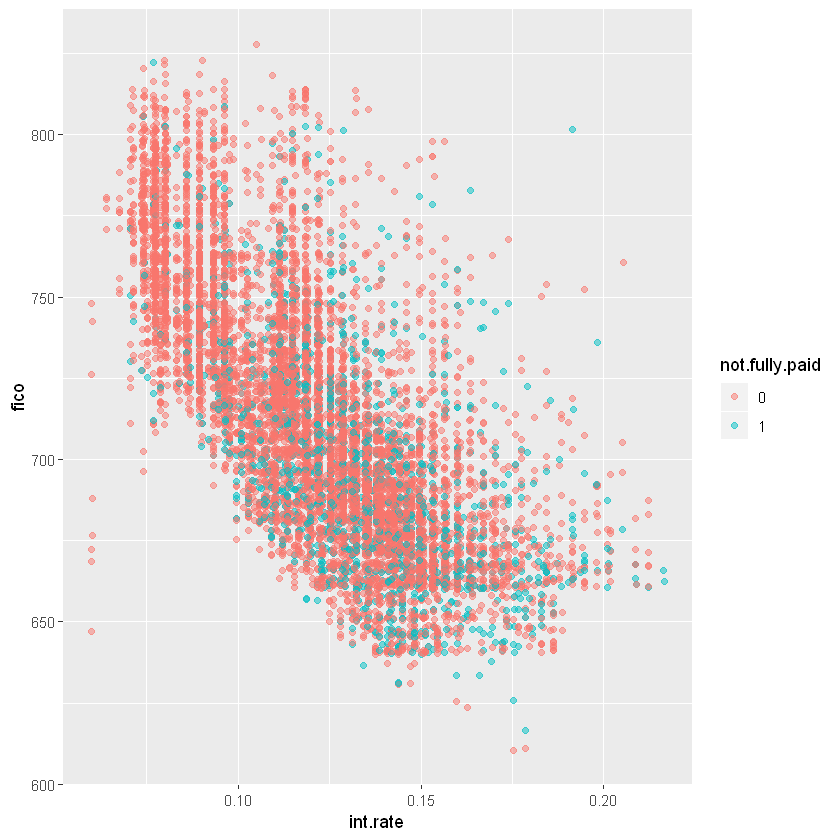

In [55]:
ggplot(data = loans , aes(x = int.rate, y = fico)) + 
geom_jitter(aes(color = not.fully.paid), alpha = 0.5)

## Building the Model

### Train and Test Sets
__Split your data into training and testing sets using the caTools library__

In [68]:
library(caTools)

set.seed(101)
sample <- sample.split(loans$not.fully.paid, 0.7)

train <- subset(loans, sample == TRUE)
test <- subset(loans, sample == FALSE)



In [72]:
library(e1071)
model <- svm(not.fully.paid ~ . , data = train)

print(summary(model))


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1





In [73]:
predicted.values <- predict(model, test[1:13])

In [74]:
table(predicted.values, test$not.fully.paid)

                
predicted.values    0    1
               0 2413  460
               1    0    0

In [75]:
# This can take 5-20 minutes
tuned.results <- tune(svm, train.x = not.fully.paid ~ . ,
                      data = train,
                      kernel = 'radial',
                     ranges = list(cost=c(100,200),
                                  gamma = c(0.1)))

In [76]:
print(summary(tuned.results))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.1

- best performance: 0.2059628 

- Detailed performance results:
  cost gamma     error dispersion
1  100   0.1 0.2059628 0.01465493
2  200   0.1 0.2208793 0.01276272



In [78]:
tuned.model <-svm(not.fully.paid ~ . , 
                  data = train, 
                  cost = 100, 
                  gamma = 0.1)

In [79]:
predicted.values.tuned <- predict(tuned.model, test[1:13])

In [81]:
table(predicted.values.tuned, test$not.fully.paid)

                      
predicted.values.tuned    0    1
                     0 2179  358
                     1  234  102